## write a python program to plot word cloud for a wikipedia page of any topic

In [2]:
!pip install wordcloud

In [4]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=9a7794a1101f233021cae6bbefc30c5868183516c6dbfc716852bccd3c5ed919
  Stored in directory: c:\users\naren\appdata\local\pip\cache\wheels\c2\46\f4\caa1bee71096d7b0cdca2f2a2af45cacf35c5760bee8f00948
Successfully built wikipedia


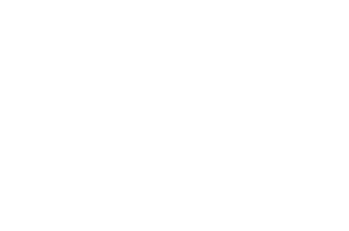

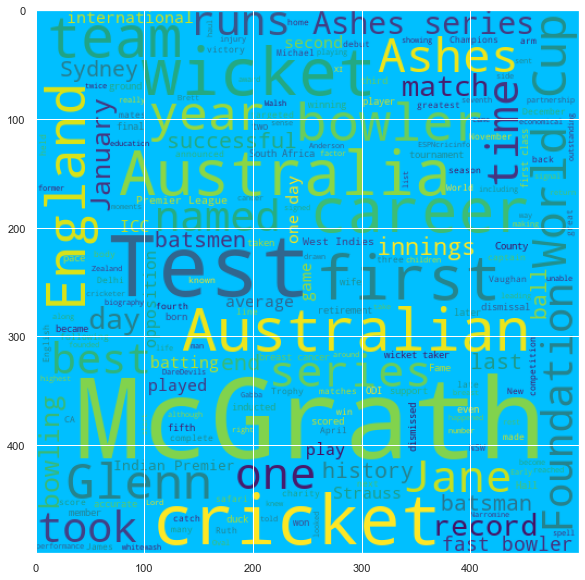

In [50]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import wikipedia as wp

result = wp.page("glenn mcgrath") # accessing the wikipedia page
final_result = result.content
def plot_wordcloud(wc):
    plt.axis("off")
    plt.figure(figsize=(10,10))
    plt.imshow(wc)
    plt.show()
wc=WordCloud(width=500, height=500, background_color="deepskyblue", random_state=10, 
             stopwords=STOPWORDS).generate(final_result)
wc.to_file("ComSc.png")
plot_wordcloud(wc)

Enter the topic for the Wikipedia page: glenn mcgrath


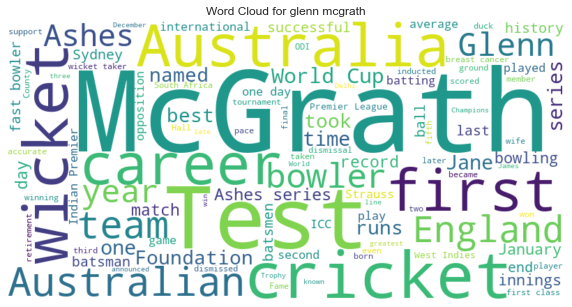

In [51]:
import wikipedia
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(topic, num_words=100):
    # Get content from the Wikipedia page
    page_content = wikipedia.page(topic).content

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, max_words=num_words, background_color='white').generate(page_content)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {topic}")
    plt.show()

if __name__ == "__main__":
    # Enter the topic for the Wikipedia page
    topic = input("Enter the topic for the Wikipedia page: ")
    generate_word_cloud(topic)

### WebScrapping HTML Scrapping

In [1]:
import pandas as pd 
from bs4 import BeautifulSoup
from urllib.request import urlopen

url="https://en.wikipedia.org/wiki/List_of_Asian_countries_by_area"
page=urlopen(url)
html_page=page.read().decode("utf-8")
soup=BeautifulSoup(html_page,"html.parser")
table=soup.find("table")
SrNo=[]
Country=[]
Area=[]
rows=table.find("tbody").find_all("tr")
for row in rows:
    cells=row.find_all("td")
    if(cells):
        SrNo.append(cells[0].get_text().strip("\n"))
        Country.append(cells[1].get_text().strip("\Xa0").strip("\n"))
        Area.append(cells[3].get_text().strip("\n").replace(",",""))
country_df=pd.DataFrame()
country_df["ID"]=SrNo
country_df["Country"]=Country
country_df["Area"]=Area

print(country_df.head(10))
#print(SrNo)
#print(Country)
#print(Area)

   ID       Country                Area
0   1         Russi  13083100 (5051400)
1   2          Chin   9596961 (3705407)
2   3          Indi   3287263 (1269219)
3   4    Kazakhstan   2600000 (1000000)
4   5   Saudi Arabi    2149690 (830000)
5   6          Iran    1648195 (636372)
6   7       Mongoli    1564110 (603910)
7   8      Indonesi    1488509 (574717)
8   9      Pakistan     881913 (340509)
9  10        Turkey     759805 (293362)


## JSON Scrapping

In [7]:
import pandas as pd
import urllib.request
import json

url="https://jsonplaceholder.typicode.com/users"
response=urllib.request.urlopen(url)
data=json.loads(response.read())

id=[]
username=[]
email=[]

for item in data:
    if "id" in item.keys():
        id.append(item["id"])
    else:
        id.append("NA")
    if "username" in item.keys():
        username.append(item["username"])
    else:
        username.append("NA")
    if "email" in item.keys():
        email.append(item["email"])
    else:
        email.append("NA")
        
user_df=pd.DataFrame()
user_df["User ID"]=id
user_df["User Name"]=username
user_df["Email Address"]=email

print(user_df.head(10))

   User ID         User Name              Email Address
0        1              Bret          Sincere@april.biz
1        2         Antonette          Shanna@melissa.tv
2        3          Samantha         Nathan@yesenia.net
3        4          Karianne  Julianne.OConner@kory.org
4        5            Kamren   Lucio_Hettinger@annie.ca
5        6  Leopoldo_Corkery    Karley_Dach@jasper.info
6        7      Elwyn.Skiles     Telly.Hoeger@billy.biz
7        8     Maxime_Nienow       Sherwood@rosamond.me
8        9          Delphine    Chaim_McDermott@dana.io
9       10    Moriah.Stanton     Rey.Padberg@karina.biz


## Exploratory data analysis in Python using Titanic Dataset 

In [3]:
import pandas as pd
titanic = pd.read_csv("train.csv")
titanic.head()
titanic.info()
titanic.describe()
titanic.isnull().sum()
titanic_cleaned = titanic.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)
titanic_cleaned.info()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.catplot(x="Sex",hue="Survived",kind="count",data=titanic_cleaned)
titanic_cleaned.groupby(['Sex','Survived'])['Survived'].count()
group1 = titanic_cleaned.groupby(['Sex','Survived'])
sns.heatmap(gender_survived,annot=True,fmt="d")
sns.heatmap(gender_survived,annot=True,fmt="d")
sns.violinplot(x="Sex",y="Age",hue="Survived",data=titanic_cleaned,split=True)
print("Oldest Person on Board:",titanic_cleaned['Age'].max())
print("Youngest Person on Board:",titanic_cleaned['Age'].min())
print("Average age of Person on Board:",titanic_cleaned['Age'].mean() 
titanic_cleaned.isnull().sum()
def impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
titanic_cleaned['Age']=titanic_cleaned[['Age','Pclass']].apply(impute,axis=1)
titanic_cleaned.isnull().sum()
titanic_cleaned.corr(method='pearson')
sns.heatmap(titanic_cleaned.corr(method="pearson"),annot=True,vmax=1)
import numpy as np 
from sklearn import datasets 
x,y,coef=datasets.make_regression(n_samples=100, n_features=1, n_informative=1, noise=10,coef=True, random_state = 0) 
x=np.interp(x,(x.min(),x.max()),(0,20)) 
print(len(x)) 
print(x)
y=np.interp(y,(y.min(),y.max()),(20000,150000)) 
print(len(y)) 
print(y)

SyntaxError: invalid non-printable character U+2003 (Temp/ipykernel_18780/103408733.py, line 20)

### 5.1) Write a python program to build a regression model that could predict the salary of an employee  from the given experience and visualize univariate linear regression on it.   

In [13]:
import numpy as np 
from sklearn import datasets 
x,y,coef=datasets.make_regression(n_samples=100, n_features=1, n_informative=1, noise=10,coef=True, random_state = 0) 
x=np.interp(x,(x.min(),x.max()),(0,20)) 
print(len(x)) 
print(x) 
y=np.interp(y,(y.min(),y.max()),(20000,150000)) 
print(len(y)) 
print(y) 

100
[[ 9.09621765]
 [14.63742853]
 [12.25580785]
 [ 7.21515957]
 [ 6.90562848]
 [12.42799856]
 [ 6.53450315]
 [12.36358975]
 [11.45101022]
 [ 9.29527704]
 [ 8.46897323]
 [11.11359701]
 [ 4.21646281]
 [ 8.92109838]
 [13.29785748]
 [15.47570863]
 [ 9.84113925]
 [17.99332461]
 [16.61818648]
 [ 7.74737185]
 [14.6461329 ]
 [18.44957388]
 [ 8.7705892 ]
 [11.88558736]
 [13.74332637]
 [13.81155569]
 [18.67718793]
 [11.97104337]
 [ 9.14449312]
 [16.94375093]
 [ 6.87377602]
 [ 8.18679147]
 [ 6.2389242 ]
 [12.15553663]
 [10.63083424]
 [12.50645606]
 [11.18464153]
 [ 8.9153091 ]
 [10.80270889]
 [ 5.39192765]
 [14.96011903]
 [12.24674897]
 [ 3.51136012]
 [19.8803112 ]
 [11.3230796 ]
 [ 9.73649581]
 [15.68932604]
 [ 7.0453415 ]
 [17.90284439]
 [12.29004918]
 [ 6.82470934]
 [ 4.69845289]
 [12.51840023]
 [14.32303265]
 [15.31240374]
 [12.25434694]
 [12.19178147]
 [ 3.42836832]
 [16.68074531]
 [ 9.811036  ]
 [ 6.97608048]
 [11.84164639]
 [15.57357937]
 [ 2.37289516]
 [ 0.        ]
 [ 4.55601227]
 [10.4

Text(0.5, 1.0, 'Experience vs Salary')

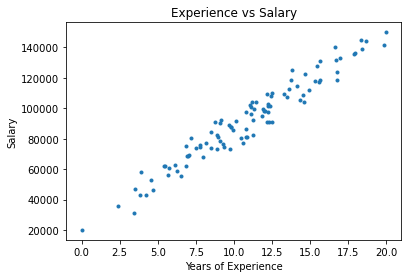

In [16]:
import matplotlib.pyplot as plt 
plt.plot(x,y,'.',label="training data") 
plt.xlabel("Years of Experience") 
plt.ylabel("Salary") 
plt.title("Experience vs Salary") 

Text(0.5, 1.0, 'Experience vs Salary')

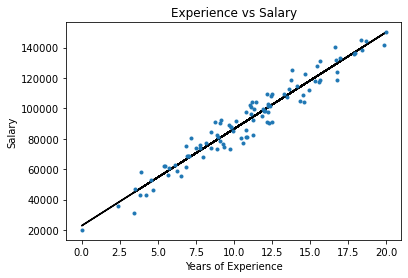

In [17]:
from sklearn.linear_model import LinearRegression 
reg_model = LinearRegression() 
reg_model.fit(x,y) 
y_pred=reg_model.predict(x) 
plt.plot(x,y_pred,color="black") 
plt.plot(x,y,'.',label="training data") 
plt.xlabel("Years of Experience") 
plt.ylabel("Salary") 
plt.title("Experience vs Salary") 

In [18]:
import pandas as pd 
data = {'Experience':np.round(x.flatten()),'Salary':np.round(y)} 
df=pd.DataFrame(data) 
df.head(10) 

,Experience,Salary
0,9.0,78311.0
1,15.0,103898.0
2,12.0,97836.0
3,7.0,80550.0
4,7.0,68556.0
5,12.0,108021.0
6,7.0,55778.0
7,12.0,101587.0
8,11.0,103967.0
9,9.0,76826.0


### 5.2) Write a python program to simulate linear model Y=10+7*x+e  for random 100 samples and visualize univariate linear regression on it. 

[105534.]


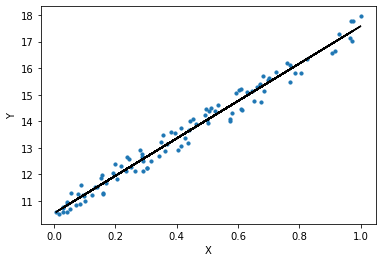

In [19]:
x1=[[13.0]] 
y1=reg_model.predict(x1) 
print(np.round(y1)) 
reg_model1=LinearRegression() 
x=np.random.rand(100,1) 
yintercept=10 
slope=7 
error=np.random.rand(100,1) 
y=yintercept+slope*x+error 
reg_model1.fit(x,y) 
y_pred=reg_model1.predict(x) 
plt.scatter(x,y,s=10) 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.plot(x,y_pred,color="black") 

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 
boston = pd.read_csv("Boston.csv") 
boston.head() 

boston.info() 

boston = boston.drop(columns="Unnamed: 0") 
boston.info()

boston_x = pd.DataFrame(boston.iloc[:,:13]) 
boston_x.head()

boston_y = pd.DataFrame(boston.iloc[:,-1]) 
boston_y.head() 

from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(boston_x, boston_y, test_size=0.3) 
print("xtrain shape", X_train.shape) 
print("ytrain shape", Y_train.shape) 

print("xtest shape", X_test.shape) 
print("ytest shape", Y_test.shape) 

plt.scatter(Y_test, Y_pred_linear, c="green") 
plt.xlabel("Actual Price(medv)") 
plt.ylabel("Predicted Pric(medv)") 
plt.title("Actual vs Prediction") 
plt.show() 

In [11]:
# practical no 6 

import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 
boston = pd.read_csv("Boston.csv") 
boston.head() 

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
boston.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [3]:
boston = boston.drop(columns="Unnamed: 0") 
boston.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
boston_x = pd.DataFrame(boston.iloc[:,:13]) 
boston_x.head() 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
boston_y = pd.DataFrame(boston.iloc[:,-1]) 
boston_y.head() 

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(boston_x, boston_y, test_size=0.3) 
print("xtrain shape", X_train.shape) 
print("ytrain shape", Y_train.shape) 

xtrain shape (354, 13)
ytrain shape (354, 1)


In [8]:
print("xtest shape", X_test.shape) 
print("ytest shape", Y_test.shape) 

xtest shape (152, 13)
ytest shape (152, 1)


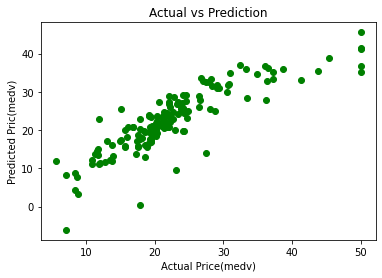

In [10]:
plt.scatter(Y_test, Y_pred_linear, c="green") 
plt.xlabel("Actual Price(medv)") 
plt.ylabel("Predicted Pric(medv)") 
plt.title("Actual vs Prediction") 
plt.show() 

In [48]:
# practical no 7

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer 
from sklearn.metrics import confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
import seaborn as sns 
breast_cancer_df = load_breast_cancer() 
x=pd.DataFrame(breast_cancer_df.data,columns=breast_cancer_df.feature_names) 
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
y=pd.Categorical.from_codes(breast_cancer_df.target,breast_cancer_df.target_names) 
print(y) 

['malignant', 'malignant', 'malignant', 'malignant', 'malignant', ..., 'malignant', 'malignant', 'malignant', 'malignant', 'benign']
Length: 569
Categories (2, object): ['malignant', 'benign']


In [26]:
y=pd.get_dummies(y,drop_first=True) 
print(y)

     benign
0         0
1         0
2         0
3         0
4         0
..      ...
564       0
565       0
566       0
567       0
568       1

[569 rows x 1 columns]


C:\Users\naren\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<AxesSubplot:xlabel='mean area', ylabel='mean compactness'>

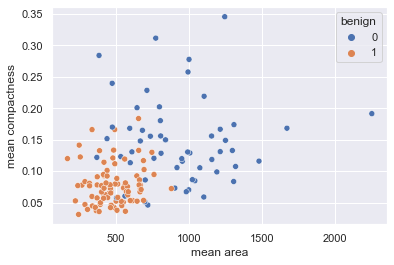

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=1) 
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean") 
knn.fit(X_train, Y_train)
sns.set()
sns.scatterplot(x="mean area", y="mean compactness", hue="benign", data=X_test.join(Y_test, how="outer")) 

In [46]:
cf=confusion_matrix(Y_test,y_pred) 
print(cf) 

[[42 13]
 [ 9 79]]


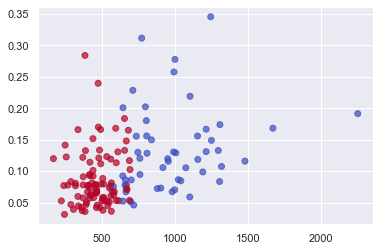

In [45]:
y_pred=knn.predict(X_test) 
plt.scatter(X_test["mean area"],X_test["mean compactness"],c=y_pred,cmap="coolwarm",alpha=0.7) 

[Text(0, 0.5, 'Malignant'), Text(0, 1.5, 'Benign')]

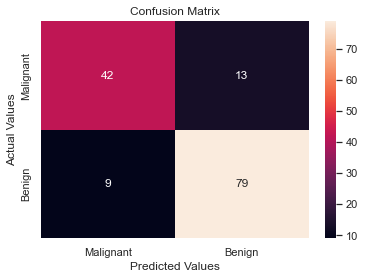

In [44]:
labels=["True Negative","False Positive","False Negative","True Positive"] 
labels=np.asarray(labels).reshape(2,2) 
categories=["Zero","One"] 
ax=plt.subplot() 
sns.heatmap(cf,annot=True,ax=ax) 
ax.set_xlabel("Predicted Values") 
ax.set_ylabel("Actual Values") 
ax.set_title("Confusion Matrix") 
ax.xaxis.set_ticklabels(["Malignant","Benign"]) 
ax.yaxis.set_ticklabels(["Malignant","Benign"]) 

## Exploratory data analysis in python using titanic dataset 

In [2]:
import pandas as pd
titanic = pd.read_csv("train.csv")
titanic.head()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic.describe()
titanic.isnull().sum()
titanic_cleaned = titanic.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)
titanic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


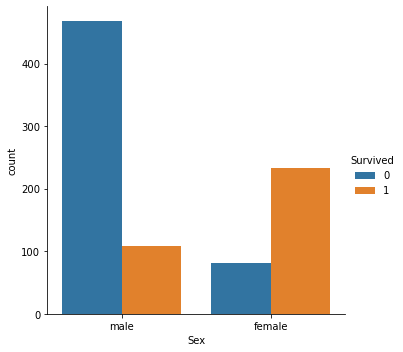

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.catplot(x="Sex",hue="Survived",kind="count",data=titanic_cleaned)

In [6]:
titanic_cleaned.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [15]:
group1=titanic_cleaned.groupby(['Sex','Survived'])
sns.heatmap(gender_survived,annot=True, fmt='d')

NameError: name 'gender_survived' is not defined

Oldest Person on Board: 80.0
Youngest Person on Board: 0.42
Average age of Person on Board: 29.100078563411895


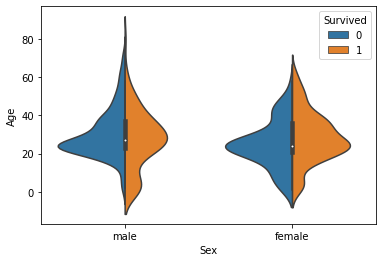

In [16]:
sns.violinplot(x="Sex",y="Age",hue="Survived",data=titanic_cleaned,split=True)
print("Oldest Person on Board:",titanic_cleaned['Age'].max())
print("Youngest Person on Board:",titanic_cleaned['Age'].min())
print("Average age of Person on Board:",titanic_cleaned['Age'].mean())

In [10]:
titanic_cleaned.isnull().sum()
def impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
titanic_cleaned['Age']=titanic_cleaned[['Age','Pclass']].apply(impute,axis=1)
titanic_cleaned.isnull().sum()
titanic_cleaned.corr(method='pearson')

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.046746,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.411805,0.083081,0.018443
Age,-0.046746,-0.411805,1.000000,-0.243877,-0.171917
SibSp,-0.035322,0.083081,-0.243877,1.000000,0.414838
Parch,0.081629,0.018443,-0.171917,0.414838,1.000000


<AxesSubplot:>

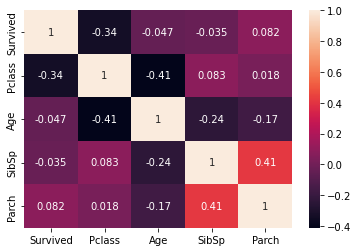

In [11]:
sns.heatmap(titanic_cleaned.corr(method="pearson"),annot=True,vmax=1)

In [12]:
import numpy as np 
from sklearn import datasets 
x,y,coef=datasets.make_regression(n_samples=100, n_features=1, n_informative=1, noise=10,coef=True, random_state = 0) 
x=np.interp(x,(x.min(),x.max()),(0,20)) 
print(len(x)) 
print(x)
y=np.interp(y,(y.min(),y.max()),(20000,150000)) 
print(len(y)) 
print(y)

100
[[ 9.09621765]
 [14.63742853]
 [12.25580785]
 [ 7.21515957]
 [ 6.90562848]
 [12.42799856]
 [ 6.53450315]
 [12.36358975]
 [11.45101022]
 [ 9.29527704]
 [ 8.46897323]
 [11.11359701]
 [ 4.21646281]
 [ 8.92109838]
 [13.29785748]
 [15.47570863]
 [ 9.84113925]
 [17.99332461]
 [16.61818648]
 [ 7.74737185]
 [14.6461329 ]
 [18.44957388]
 [ 8.7705892 ]
 [11.88558736]
 [13.74332637]
 [13.81155569]
 [18.67718793]
 [11.97104337]
 [ 9.14449312]
 [16.94375093]
 [ 6.87377602]
 [ 8.18679147]
 [ 6.2389242 ]
 [12.15553663]
 [10.63083424]
 [12.50645606]
 [11.18464153]
 [ 8.9153091 ]
 [10.80270889]
 [ 5.39192765]
 [14.96011903]
 [12.24674897]
 [ 3.51136012]
 [19.8803112 ]
 [11.3230796 ]
 [ 9.73649581]
 [15.68932604]
 [ 7.0453415 ]
 [17.90284439]
 [12.29004918]
 [ 6.82470934]
 [ 4.69845289]
 [12.51840023]
 [14.32303265]
 [15.31240374]
 [12.25434694]
 [12.19178147]
 [ 3.42836832]
 [16.68074531]
 [ 9.811036  ]
 [ 6.97608048]
 [11.84164639]
 [15.57357937]
 [ 2.37289516]
 [ 0.        ]
 [ 4.55601227]
 [10.4

In [14]:
import pandas as pd
titanic = pd.read_csv("train.csv")
titanic.head()
titanic.info()

titanic.describe()
titanic.isnull().sum()
titanic_cleaned = titanic.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)
titanic_cleaned.info()

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.catplot(x="Sex",hue="Survived",kind="count",data=titanic_cleaned)

titanic_cleaned.groupby(['Sex','Survived'])['Survived'].count()

group1=titanic_cleaned.groupby(['Sex','Survived'])
sns.heatmap(gender_survived,annot=True, fmt='d')

sns.violinplot(x="Sex",y="Age",hue="Survived",data=titanic_cleaned,split=True)
print("Oldest Person on Board:",titanic_cleaned['Age'].max())
print("Youngest Person on Board:",titanic_cleaned['Age'].min())
print("Average age of Person on Board:",titanic_cleaned['Age'].mean())

titanic_cleaned.isnull().sum()
def impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
titanic_cleaned['Age']=titanic_cleaned[['Age','Pclass']].apply(impute,axis=1)
titanic_cleaned.isnull().sum()
titanic_cleaned.corr(method='pearson')

sns.heatmap(titanic_cleaned.corr(method="pearson"),annot=True,vmax=1)

import numpy as np 
from sklearn import datasets 
x,y,coef=datasets.make_regression(n_samples=100, n_features=1, n_informative=1, noise=10,coef=True, random_state = 0) 
x=np.interp(x,(x.min(),x.max()),(0,20)) 
print(len(x)) 
print(x)
y=np.interp(y,(y.min(),y.max()),(20000,150000)) 
print(len(y)) 
print(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
